In [24]:
import cv2
from google.colab.patches import cv2_imshow

In [35]:
input_path = "/content/download (1).jpg"
cascade_face_path = "/content/haarcascade_frontalface.xml"
path_cascade_eyes = "/content/haarcascade_eye.xml"
path_cascade_smile = "/content/haarcascade_smile.xml"

In [36]:

def detection_face_eyes_smile(img_path, cas_face_path, cas_eyes_path, cas_smile_path):
    image = cv2.imread(img_path)
    copy = image.copy()
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    har_cas_face = cv2.CascadeClassifier(cas_face_path)
    har_cas_eyes = cv2.CascadeClassifier(cas_eyes_path)
    har_cas_smile = cv2.CascadeClassifier(cas_smile_path)
    detection_face = har_cas_face.detectMultiScale(gray_image, 1.5, 8)
    detection_eyes = []  # Initialize the variable outside the loop
    detection_smile = []

    # face
    for box in detection_face:
        x, y, w, h = box
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 255), 2)

        # crop face
        crop = gray_image[y:y + h, x:x + w]
        crop_copy = copy[y:y + h, x:x + w]
        cv2.imwrite("face_crop.jpg", crop_copy)

        detection_eyes = har_cas_eyes.detectMultiScale(crop, 1.1, 2)

        for box_eyes in detection_eyes:
            X, Y, W, H = box_eyes
            cv2.rectangle(image, (x + X, y + Y), (x + X + W, y + Y + H), (0, 255, 255), 1)

        detection_smile = har_cas_smile.detectMultiScale(crop, 1.1, 2)
        for box_smile in detection_smile:
            X, Y, W, H = box_smile
            cv2.rectangle(image, (x + X, y + Y), (x + X + W, y + Y + H), (0, 0, 255), 1)

    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return detection_face, detection_eyes, detection_smile

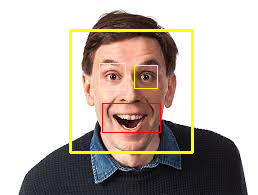

In [37]:

dtc = detection_face_eyes_smile(input_path, cascade_face_path, path_cascade_eyes, path_cascade_smile)

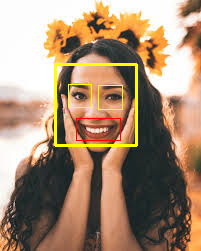

In [39]:
img_path= "/content/images.jpg"
dtc = detection_face_eyes_smile(img_path, cascade_face_path, path_cascade_eyes, path_cascade_smile)